Cavity Flow with Navier–Stokes
=====
***

Original python code and result
----

This is the provided python code from the 13th lecture about the Navier-Stokes equation

In [1]:
import numpy
import time
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
nx = 100
ny = 100
nt = 500
nit = 50
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)

rho = 1
nu = .1
dt = .001

u = numpy.zeros((ny, nx))
v = numpy.zeros((ny, nx))
p = numpy.zeros((ny, nx)) 
b = numpy.zeros((ny, nx))

In [3]:
def build_up_b(b, rho, dt, u, v, dx, dy):
    
    b[1:-1, 1:-1] = (rho * (1 / dt * 
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / 
                     (2 * dx) + (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) -
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 -
                      2 * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) *
                           (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx))-
                          ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))**2))

    return b

In [4]:
def pressure_poisson(p, dx, dy, b):
    pn = numpy.empty_like(p)
    pn = p.copy()
    
    for q in range(nit):
        pn = p.copy()
        p[1:-1, 1:-1] = (((pn[1:-1, 2:] + pn[1:-1, 0:-2]) * dy**2 + 
                          (pn[2:, 1:-1] + pn[0:-2, 1:-1]) * dx**2) /
                          (2 * (dx**2 + dy**2)) -
                          dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * 
                          b[1:-1,1:-1])

        p[:, -1] = p[:, -2] # dp/dx = 0 at x = 2
        p[0, :] = p[1, :]   # dp/dy = 0 at y = 0
        p[:, 0] = p[:, 1]   # dp/dx = 0 at x = 0
        p[-1, :] = 0        # p = 0 at y = 2
        
    return p

In [5]:
def cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu):
    un = numpy.empty_like(u)
    vn = numpy.empty_like(v)
    b = numpy.zeros((ny, nx))
    
    for n in range(nt):
        un = u.copy()
        vn = v.copy()
        
        b = build_up_b(b, rho, dt, u, v, dx, dy)
        p = pressure_poisson(p, dx, dy, b)
        
        u[1:-1, 1:-1] = (un[1:-1, 1:-1]-
                         un[1:-1, 1:-1] * dt / dx *
                        (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                         vn[1:-1, 1:-1] * dt / dy *
                        (un[1:-1, 1:-1] - un[0:-2, 1:-1]) -
                         dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                         nu * (dt / dx**2 *
                        (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                         dt / dy**2 *
                        (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])))

        v[1:-1,1:-1] = (vn[1:-1, 1:-1] -
                        un[1:-1, 1:-1] * dt / dx *
                       (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                        vn[1:-1, 1:-1] * dt / dy *
                       (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -
                        dt / (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                        nu * (dt / dx**2 *
                       (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                        dt / dy**2 *
                       (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))

        u[0, :]  = 0
        u[:, 0]  = 0
        u[:, -1] = 0
        u[-1, :] = 1    # set velocity on cavity lid equal to 1
        v[0, :]  = 0
        v[-1, :] = 0
        v[:, 0]  = 0
        v[:, -1] = 0
        
        
    return u, v, p

In [6]:
u = numpy.zeros((ny, nx))
v = numpy.zeros((ny, nx))
p = numpy.zeros((ny, nx))
b = numpy.zeros((ny, nx))
nt = 100
start = time.time()
u, v, p = cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu)
end = time.time()
computation_time = (end - start)

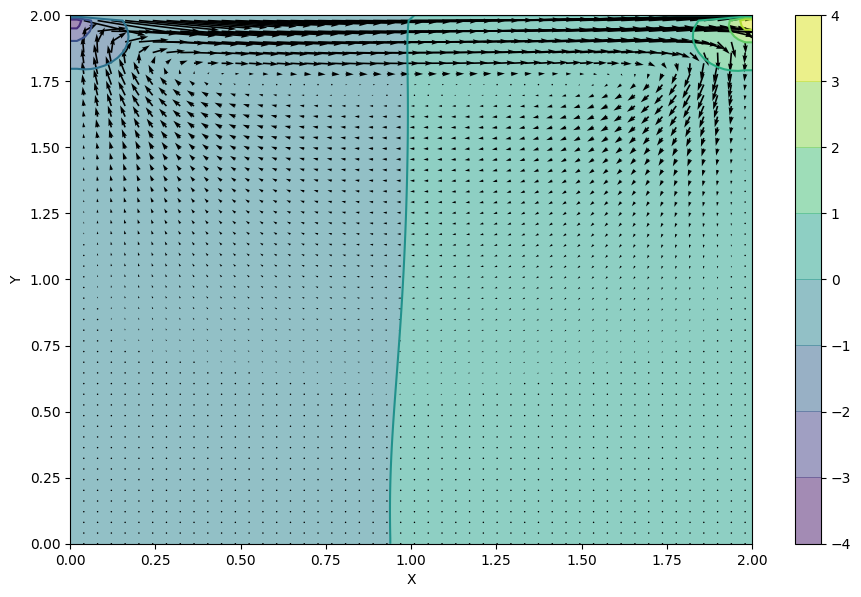

In [7]:
x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)
X, Y = numpy.meshgrid(x, y)

fig = pyplot.figure(figsize=(11,7), dpi=100)
# plotting the pressure field as a contour
pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)  
pyplot.colorbar()
# plotting the pressure field outlines
pyplot.contour(X, Y, p, cmap=cm.viridis)  
# plotting velocity field
pyplot.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2], v[::2, ::2]) 
pyplot.xlabel('X')
pyplot.ylabel('Y');

#### Computation time

In [8]:
print (str(round(computation_time * 1000)) + " milliseconds")

639 milliseconds


C++ result
---

The C++ code can be found in the folder "navier-stokes".

In [9]:
from numpy import genfromtxt

### No parallelization

This is the result of the implementation of the Navier-Stokes equation in c++. This code is essentially the above python code translated to c++.

In [10]:
ucpp = genfromtxt('navier-stokes/result/u.csv', delimiter=',')
vcpp = genfromtxt('navier-stokes/result/v.csv', delimiter=',')
pcpp = genfromtxt('navier-stokes/result/p.csv', delimiter=',')

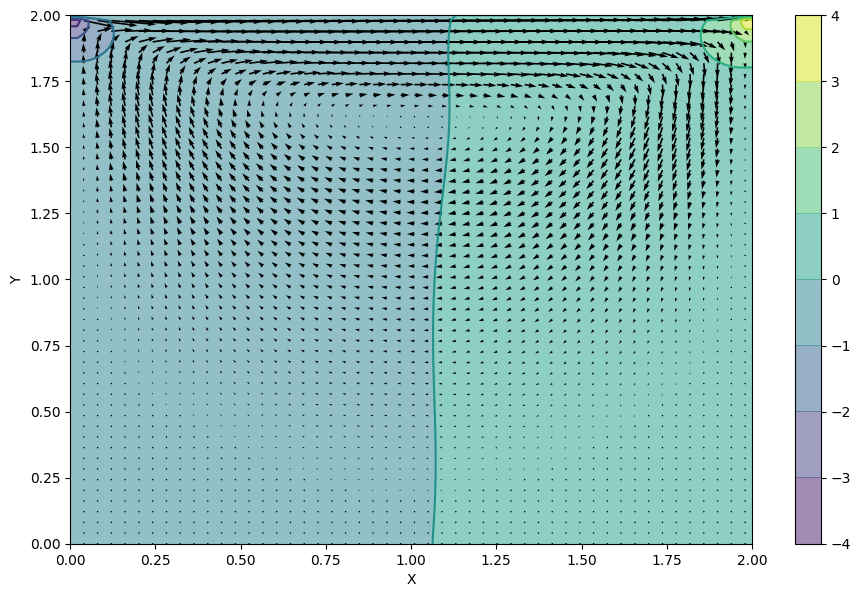

In [11]:
x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)
X, Y = numpy.meshgrid(x, y)

fig = pyplot.figure(figsize=(11,7), dpi=100)
# plotting the pressure field as a contour
pyplot.contourf(X, Y, pcpp, alpha=0.5, cmap=cm.viridis)  
pyplot.colorbar()
# plotting the pressure field outlines
pyplot.contour(X, Y, pcpp, cmap=cm.viridis)  
# plotting velocity field
pyplot.quiver(X[::2, ::2], Y[::2, ::2], ucpp[::2, ::2], vcpp[::2, ::2]) 
pyplot.xlabel('X')
pyplot.ylabel('Y');

#### Computation time

In [12]:
f = open('navier-stokes/result/milliseconds', 'r')
time = f.read()
print (time + " milliseconds")
f.close()

7928 milliseconds


### OpenMP

This is the result of extending the above code with OpenMP. Most of the for-loops, which represent matrix operations can be parallized. To add the parallelization, "#pragma omp parallel for" has been added above the for-loops.

In [13]:
ucpp_openmp = genfromtxt('navier-stokes/result/u-openmp.csv', delimiter=',')
vcpp_openmp = genfromtxt('navier-stokes/result/v-openmp.csv', delimiter=',')
pcpp_openmp = genfromtxt('navier-stokes/result/p-openmp.csv', delimiter=',')

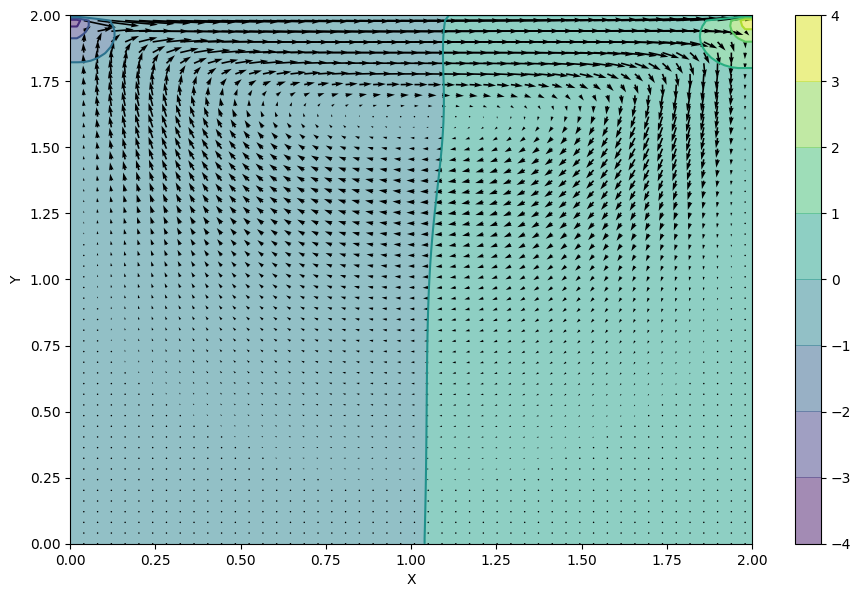

In [14]:
x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)
X, Y = numpy.meshgrid(x, y)

fig = pyplot.figure(figsize=(11,7), dpi=100)
# plotting the pressure field as a contour
pyplot.contourf(X, Y, pcpp_openmp, alpha=0.5, cmap=cm.viridis)  
pyplot.colorbar()
# plotting the pressure field outlines
pyplot.contour(X, Y, pcpp_openmp, cmap=cm.viridis)  
# plotting velocity field
pyplot.quiver(X[::2, ::2], Y[::2, ::2], ucpp_openmp[::2, ::2], vcpp_openmp[::2, ::2]) 
pyplot.xlabel('X')
pyplot.ylabel('Y');

In [15]:
f = open('navier-stokes/result/milliseconds-openmp', 'r')
time = f.read()
print (time + " milliseconds")
f.close()

1 milliseconds


### MPI

This is the result of extending the original c++ code with MPI. The implementation broadcasts the following data:

\- matrix b: at the end of function "build_up_b"

\- matrix p: every iteration in the first loop of function "pressure_poisson"

\- matrix u and v: every iteration in the first loop of "cavity_flow"

To notify the other processes of their result. It seems like the data is cut off, as the larger the number of processes, the sparser the matrices become. Therefore, I believe the problem lies with the indexation in the functions.

This result is achieved by running the code with 2 processes.

In [16]:
ucpp_mpi = genfromtxt('navier-stokes/result/u-mpi-2.csv', delimiter=',')
vcpp_mpi = genfromtxt('navier-stokes/result/v-mpi-2.csv', delimiter=',')
pcpp_mpi = genfromtxt('navier-stokes/result/p-mpi-2.csv', delimiter=',')

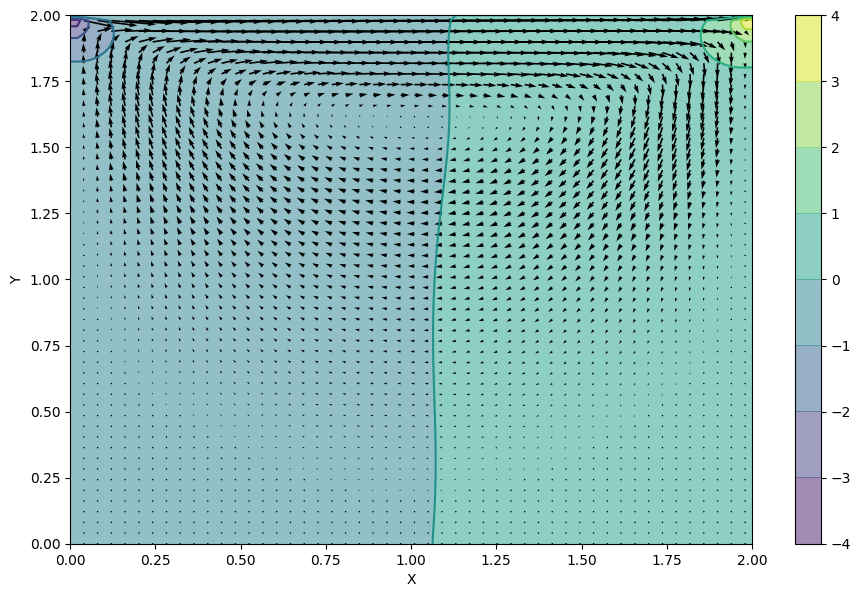

In [17]:
x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)
X, Y = numpy.meshgrid(x, y)

fig = pyplot.figure(figsize=(11,7), dpi=100)
# plotting the pressure field as a contour
pyplot.contourf(X, Y, pcpp_mpi, alpha=0.5, cmap=cm.viridis)  
pyplot.colorbar()
# plotting the pressure field outlines
pyplot.contour(X, Y, pcpp_mpi, cmap=cm.viridis)  
# plotting velocity field
pyplot.quiver(X[::2, ::2], Y[::2, ::2], ucpp_mpi[::2, ::2], vcpp_mpi[::2, ::2]) 
pyplot.xlabel('X')
pyplot.ylabel('Y');

In [18]:
f = open('navier-stokes/result/milliseconds-mpi-2', 'r')
time = f.read()
print (time + " milliseconds")
f.close()

7 milliseconds


This result is achieved by running the code with 4 processes.

In [19]:
ucpp_mpi = genfromtxt('navier-stokes/result/u-mpi-4.csv', delimiter=',')
vcpp_mpi = genfromtxt('navier-stokes/result/v-mpi-4.csv', delimiter=',')
pcpp_mpi = genfromtxt('navier-stokes/result/p-mpi-4.csv', delimiter=',')

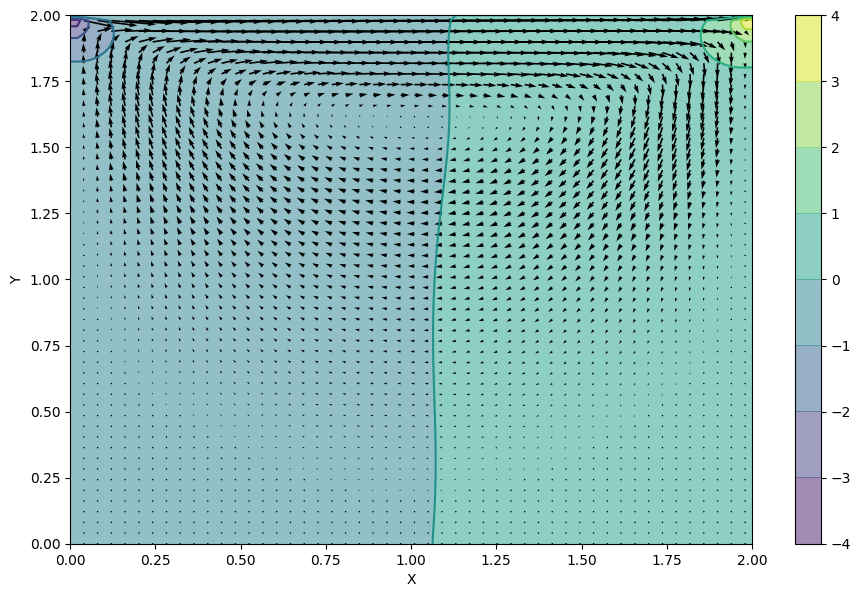

In [20]:
x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)
X, Y = numpy.meshgrid(x, y)

fig = pyplot.figure(figsize=(11,7), dpi=100)
# plotting the pressure field as a contour
pyplot.contourf(X, Y, pcpp_mpi, alpha=0.5, cmap=cm.viridis)  
pyplot.colorbar()
# plotting the pressure field outlines
pyplot.contour(X, Y, pcpp_mpi, cmap=cm.viridis)  
# plotting velocity field
pyplot.quiver(X[::2, ::2], Y[::2, ::2], ucpp_mpi[::2, ::2], vcpp_mpi[::2, ::2]) 
pyplot.xlabel('X')
pyplot.ylabel('Y');

In [21]:
f = open('navier-stokes/result/milliseconds-mpi-4', 'r')
time = f.read()
print (time + " milliseconds")
f.close()

8 milliseconds
